In [1]:
import numpy as np 

from oracle import simulator_moslb
from moslb import moslb

In [2]:
m = 3 # number of objectives
d = 5 # number of context's dimension
K = 5 * d # number of arms at each round

In [3]:
env = simulator_moslb(num_obj=m,num_dim=d,num_arm=K,vary_context=0)
env.reset()

In [4]:
alg = moslb(num_dim=d, num_obj=m)
alg.reset()

In [5]:
T = 1000
R = 0 
R_his = [0]

for t in range(T): 
    X = env.observe_context(verbose=1)
    a_t = alg.take_action(X, alpha=.1)

    r_t = env.get_reward(a_t)
    reg_t = env.regret(a_t)
    alg.update_params(arm=X[a_t], reward=r_t)

    R += reg_t
    R_his.append(R)
    if (t+1)%100 == 0: print('Round: {:d}, regret: {:.4f}'.format(t, R))

{'#arms': 25,
 '#dimension': 5,
 '#objective': 3,
 '#optimal arms': 11,
 'Regret for each arm': array([[0.10703346],
       [0.24042706],
       [0.21441258],
       [0.32345093],
       [0.        ],
       [0.2240112 ],
       [0.        ],
       [0.11497998],
       [0.        ],
       [0.04665695],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.16490191],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.0285683 ],
       [0.        ],
       [0.13621852],
       [0.        ],
       [0.12311157],
       [0.00966445],
       [0.17588235],
       [0.1701852 ]])}
Round: 99, regret: 2.6124
Round: 199, regret: 3.3719
Round: 299, regret: 4.2754
Round: 399, regret: 4.4496
Round: 499, regret: 4.5068
Round: 599, regret: 4.5068
Round: 699, regret: 6.0652
Round: 799, regret: 8.3017
Round: 899, regret: 8.9816
Round: 999, regret: 9.5456


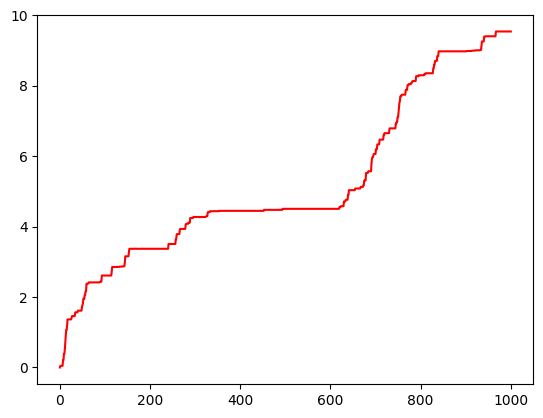

In [6]:
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.figure()
plt.plot(range(T+1), R_his, color='r', linestyle='-', label="P-UCB")

## Example for MOSLB-PL
Running with five objectives under MPL-PL order $\{\{0,1,2\},\{3,4\}\}$.

In [7]:
from oracle import simulator_moslb_pl
from moslb import moslb_pl

In [8]:
pl = [[0,1,2],[3,4]]

In [9]:
env = simulator_moslb_pl(num_dim=d,priority_level=pl,num_arm=K,vary_context=1)

In [10]:
alg = moslb_pl(num_dim=d, priority_level=pl)

In [11]:
T = 3000
R = np.zeros((len(pl),))
epsilon = 5 * d**(2/3) * (T)**(-1/3)

env.reset()
alg.reset()

for t in range(T): 
    X = env.observe_context(verbose=0)
    a_t = alg.take_action(X, epsilon=epsilon, alpha=.1)

    r_t = env.get_reward(a_t)
    reg_t = env.regret(a_t)
    alg.update_params(arm=X[a_t], reward=r_t)

    R += reg_t
    if (t+1)%100 == 0: print('Round: {:d}, regret: {}'.format(t, R))

Round: 99, regret: [10.46704447  4.93000229]
Round: 199, regret: [18.84978107 10.97104782]
Round: 299, regret: [28.30183328 16.46731616]
Round: 399, regret: [37.8352099  24.73917367]
Round: 499, regret: [39.40723782 27.11853818]
Round: 599, regret: [40.3246316  28.20882702]
Round: 699, regret: [40.81097709 29.11912417]
Round: 799, regret: [41.07877629 29.7497952 ]
Round: 899, regret: [41.60000745 30.37707559]
Round: 999, regret: [41.92933144 31.483359  ]
Round: 1099, regret: [42.20180864 33.11217866]
Round: 1199, regret: [42.57879491 33.68631089]
Round: 1299, regret: [43.00331133 35.06865817]
Round: 1399, regret: [43.39309547 35.51953484]
Round: 1499, regret: [43.68738913 36.07595446]
Round: 1599, regret: [43.98476118 36.88451335]
Round: 1699, regret: [44.03247898 37.83264066]
Round: 1799, regret: [44.27253578 38.55492708]
Round: 1899, regret: [44.4517525  39.31349927]
Round: 1999, regret: [44.60140458 39.46529686]
Round: 2099, regret: [44.6718014  40.08627253]
Round: 2199, regret: [45

## Example for MOSLB-PC
Running with five objectives under MPL-PC relation $\{\{0,1\},\{2,3,4\}\}$.

In [12]:
from oracle import simulator_moslb_pc
from moslb import moslb_pc

In [13]:
pc = [[0,1],[2,3,4]]

In [14]:
env = simulator_moslb_pc(num_dim=d,priority_chain=pc,num_arm=K,vary_context=True)
env.reset()

In [15]:
alg = moslb_pc(num_dim=d, priority_chain=pc)

In [16]:
T = 3000
R = np.zeros((env.c_max,))
epsilon = 5 * d**(2/3) * (T)**(-1/3)

env.reset()
alg.reset()

for t in range(T): 
    X = env.observe_context(verbose=0)
    a_t = alg.take_action(X, epsilon=epsilon, alpha=.1)

    r_t = env.get_reward(a_t)
    reg_t = env.regret(a_t)
    alg.update_params(arm=X[a_t], reward=r_t)

    R += reg_t
    if (t+1)%100 == 0: print('Round: {:d}, regret: {}'.format(t, R))

Round: 99, regret: [3.13 1.04 2.13]
Round: 199, regret: [6.36 2.08 3.64]
Round: 299, regret: [9.74 3.64 5.84]
Round: 399, regret: [12.51  3.64  9.8 ]
Round: 499, regret: [13.56  3.64  9.8 ]
Round: 599, regret: [13.56  3.64  9.8 ]
Round: 699, regret: [13.56  3.64  9.8 ]
Round: 799, regret: [13.63  3.64  9.8 ]
Round: 899, regret: [13.63  3.64  9.8 ]
Round: 999, regret: [14.1   3.64 10.68]
Round: 1099, regret: [17.03  3.64 17.06]
Round: 1199, regret: [20.03  3.64 23.66]
Round: 1299, regret: [22.28  3.64 28.61]
Round: 1399, regret: [24.58  3.64 33.67]
Round: 1499, regret: [27.08  3.64 39.17]
Round: 1599, regret: [29.48  3.64 44.45]
Round: 1699, regret: [32.35  3.64 50.61]
Round: 1799, regret: [34.95  3.64 56.33]
Round: 1899, regret: [37.4   3.64 61.72]
Round: 1999, regret: [39.75  3.64 66.89]
Round: 2099, regret: [40.1   3.64 67.66]
Round: 2199, regret: [40.1   3.64 67.66]
Round: 2299, regret: [40.1   3.64 67.66]
Round: 2399, regret: [40.17  3.64 67.66]
Round: 2499, regret: [40.17  3.64 67